In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def swap_sentence(df):
    df_swapped = df.copy()
    
    df_swapped["sentence_1"] = df["sentence_2"]
    df_swapped["sentence_2"] = df["sentence_1"]
    df_swapped["id"] = df_swapped["id"] + "_swapped"

    df_swapped = pd.concat([df, df_swapped], ignore_index=True)
    return df_swapped

def copy_sentence(df,start,end):
    
    df_copy = df[df["label"] == 0][start:end].copy()
    df_copy["sentence_2"] = df["sentence_1"]
    df_copy["label"] = 5.0
    df_copy["binary-label"] = 1.0
    df_copy["id"] = df_copy["id"] + "_copied"

    df_copied = pd.concat([df, df_copy], ignore_index=True)
    return df_copied

In [3]:
train = pd.read_csv('../data/train.csv')
dev = pd.read_csv("../data/dev.csv")

# train data sentence swap
train_swapped = swap_sentence(train)
train_swapped.to_csv("../data/train2.csv", index=False)

# dev data sentence swap
dev_swapped = swap_sentence(dev)
dev_swapped.to_csv("../data/dev2.csv", index=False)


# sentence swap without label value 0.0
train_without0_df = train[train["label"] != 0.0]
train_only0_df = train[train["label"] == 0.0]
train_without0_swapped = swap_sentence(train_without0_df)
pd.concat([train_without0_swapped, train_only0_df], ignore_index=True).to_csv("../data/train3.csv", index=False)

In [51]:
train_all = pd.read_csv('../data/train_all.csv')
train_all_swapped = swap_sentence(train_all)
train_all_swapped.to_csv("../data/train4.csv", index=False)

train_repeat = pd.read_csv('../data/train_repeat.csv')
train_repeat_swapped = swap_sentence(train_all)
train_repeat_swapped.to_csv("../data/train5.csv", index=False)


train_spacing_repeat = pd.read_csv('../data/train_spacing_repeat.csv')
train_spacing_repeat_swapped = swap_sentence(train_all)
train_spacing_repeat_swapped.to_csv("../data/train6.csv", index=False)


train_spacing_spell = pd.read_csv('../data/train_spacing_spell.csv')
train_spacing_spell_swapped = swap_sentence(train_all)
train_spacing_spell_swapped.to_csv("../data/train7.csv", index=False)


train_spacing = pd.read_csv('../data/train_spacing.csv')
train_spacing_swapped = swap_sentence(train_all)
train_spacing_swapped.to_csv("../data/train8.csv", index=False)


train_spell_repeat = pd.read_csv('../data/train_spell_repeat.csv')
train_spell_repeat_swapped = swap_sentence(train_all)
train_spell_repeat_swapped.to_csv("../data/train9.csv", index=False)


train_spell = pd.read_csv('../data/train_spell.csv')
train_spell_swapped = swap_sentence(train_all)
train_spell_swapped.to_csv("../data/train10.csv", index=False)




In [52]:
train_all_without_0 = train_all[train_all["label"] != 0.0]
train_all_0 = train_all[train_all["label"] == 0.0]
train_all_without0_swapped = swap_sentence(train_all_without_0)
pd.concat([train_all_without0_swapped, train_all_0], ignore_index=True).to_csv("../data/train11.csv", index=False)

In [53]:
# train_all에 swap_sentence 진행한 데이터셋에 750 데이터 copy_sentence 진행
df = pd.read_csv('../data/train4.csv')
train_all_swapped_copied = copy_sentence(df,500,1250)
train_all_swapped_copied.to_csv("../data/train12.csv", index=False)

# train_spacing_repeat에 swap_sentence 진행한 데이터셋에 750 데이터 copy_sentence 진행
df2 = pd.read_csv('../data/train6.csv')
train_spacing_repeat_swapped_copied = copy_sentence(df2,500,1250)
train_spacing_repeat_swapped_copied.to_csv("../data/train13.csv", index=False)

# train_all에 label 값 0 제외 swap_sentence 진행한 데이터셋에 750 데이터 copy_sentence 진행
df3 = pd.read_csv("../data/train11.csv")
train_all_without0_swapped_copied = copy_sentence(df3,500,1250)
train_all_without0_swapped_copied.to_csv("../data/train14.csv", index=False)

In [54]:
# train_all에 swap_sentence 진행한 데이터셋에 500 데이터 copy_sentence 진행
df = pd.read_csv('../data/train4.csv')
train_all_swapped_copied = copy_sentence(df,1000,1500)
train_all_swapped_copied.to_csv("../data/train15.csv", index=False)


# train_all에 label 값 0 제외 swap_sentence 진행한 데이터셋에 500 데이터 copy_sentence 진행
df3 = pd.read_csv("../data/train11.csv")
train_all_without0_swapped_copied = copy_sentence(df3,1000,1500)
train_all_without0_swapped_copied.to_csv("../data/train16.csv", index=False)

In [21]:
# sr_df: preprocess 된 데이터셋에 Synonym Replacement 진행한 데이터셋
sr_df = pd.read_csv('../data/SR_train_3.csv')



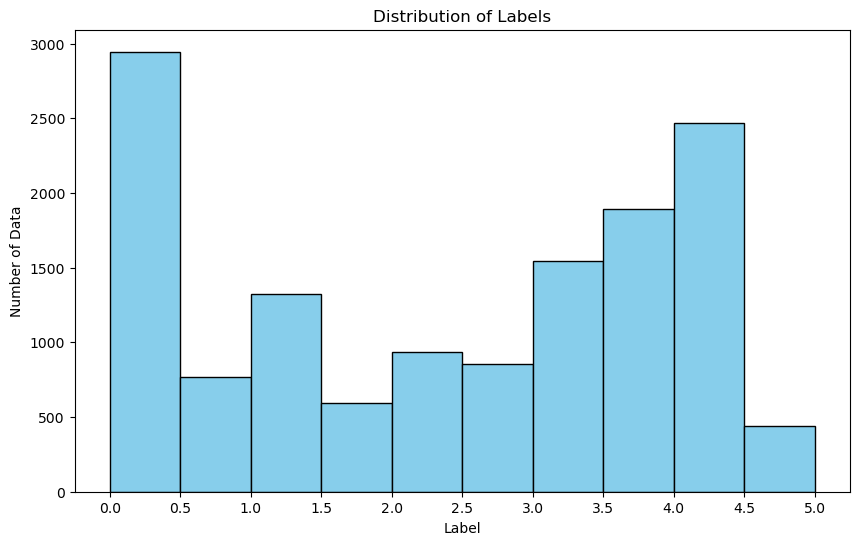

In [22]:
plt.figure(figsize=(10, 6))
sr_df['label'].plot(kind='hist', bins=np.arange(0, 5.5, 0.5), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels')
plt.show()

In [23]:
# sr data에 스왑
sr_swapped = swap_sentence(sr_df)
sr_swapped.to_csv("../data/sr1.csv", index=False)

# sr data + swap + label 0 data 750개 copy
sr_swapped_copied = copy_sentence(sr_swapped,500,1250)
sr_swapped_copied.to_csv("../data/sr2.csv", index=False)

# sr data without 0 + swap + label 0 data 750개 copy
sr_without0_df = sr_df[sr_df["label"] != 0.0]
sr_only0_df = sr_df[sr_df["label"] == 0.0]
sr_without0_swapped = swap_sentence(sr_without0_df)
sr_swapped_without0 = pd.concat([sr_only0_df, sr_without0_swapped], ignore_index=True)
sr_without0_swapped.to_csv("../data/sr3.csv", index=False)

sr_without0_swapped_copied = copy_sentence(sr_swapped_without0,500,1250)
sr_without0_swapped_copied.to_csv("../data/sr4.csv", index=False)

In [24]:
mask = (
    ((sr_df['label'] >= 0.0) & (sr_df['label'] < 0.5)) |
    ((sr_df['label'] >= 3.0) & (sr_df['label'] < 4.5))
)

removed_mask = ~mask

# 0.0 - 0.5, 3.0 -4.5 만 가지는 데이터
sr_included_df = sr_df[mask]

# 0.0 - 0.5, 3.0 - 4.5 제외한 데이터
sr_removed_df = sr_df[removed_mask]

sr_removed_swapped = swap_sentence(sr_removed_df)
sr_range_swapped = pd.concat([sr_included_df, sr_removed_swapped], ignore_index=True)

sr_range_swapped.to_csv("../data/sr5.csv", index=False)
sr_range_swapped_copied = copy_sentence(sr_range_swapped,500,1250)
sr_range_swapped_copied.to_csv("../data/sr6.csv", index=False)



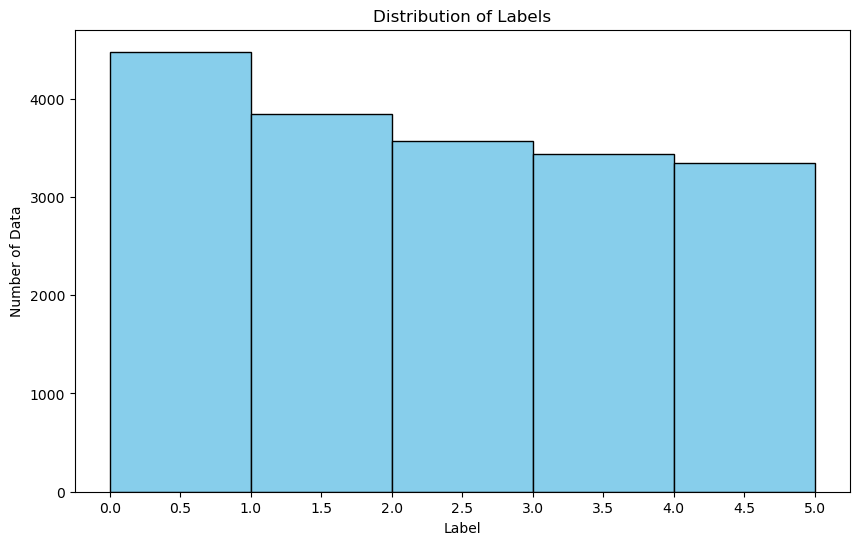

In [25]:
plt.figure(figsize=(10, 6))
sr_range_swapped['label'].plot(kind='hist', bins=np.arange(0, 5.5, 1), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels')
plt.show()

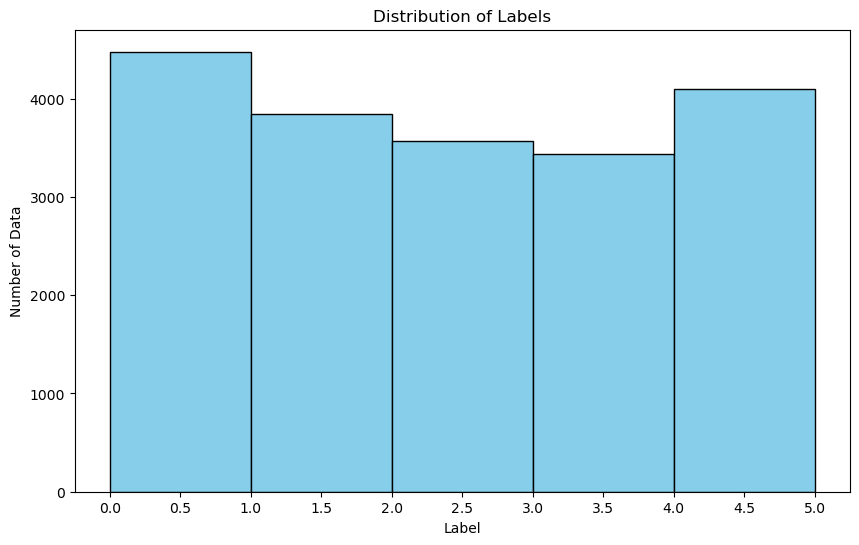

In [26]:
plt.figure(figsize=(10, 6))
sr_range_swapped_copied['label'].plot(kind='hist', bins=np.arange(0, 5.5, 1), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels')
plt.show()

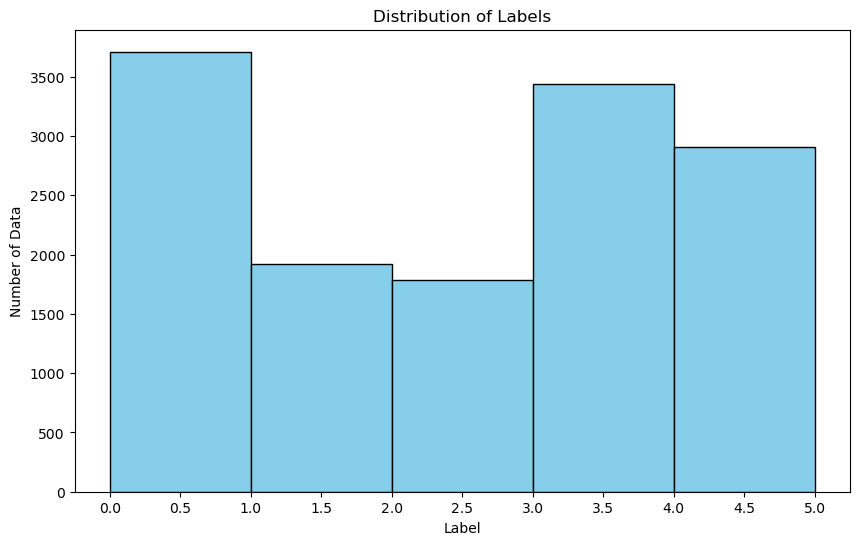

In [27]:
plt.figure(figsize=(10, 6))
sr_df['label'].plot(kind='hist', bins=np.arange(0, 5.5, 1), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels')
plt.show()

In [10]:
# 1.0 -3.0
sr_1_3 = sr_df[(sr_df['label'] >= 1.0) & (sr_df['label'] < 3.0)]
sr_rest = sr_df[((sr_df['label'] >= 0.0) & (sr_df['label'] < 1.0)) | 
                       (sr_df['label'] >= 3.0)]

sr_1_3_swapped = swap_sentence(sr_1_3)
sr_swap = pd.concat([sr_rest, sr_1_3_swapped], ignore_index=True)

sr_swap.to_csv("../data/sr7.csv", index=False)
sr_swap_copy = copy_sentence(sr_swap,1000,2000)
sr_swap_copy.to_csv("../data/sr8.csv", index=False)

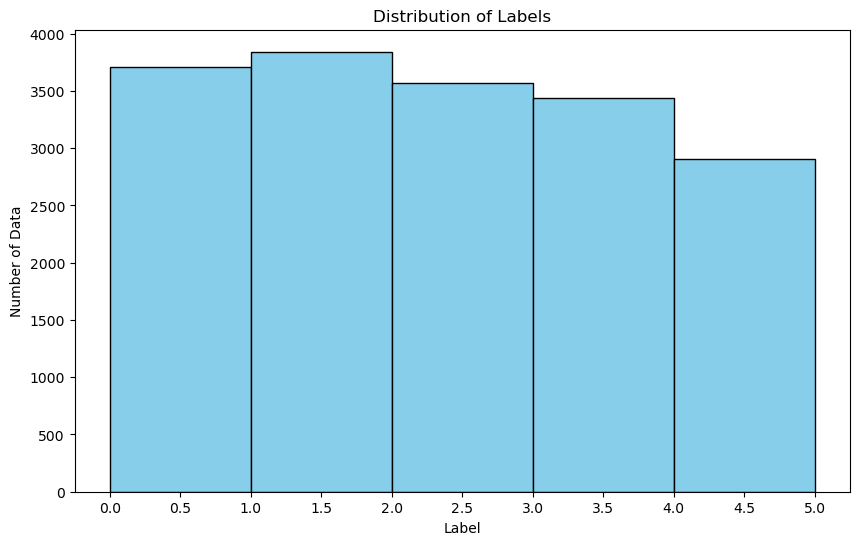

In [28]:
plt.figure(figsize=(10, 6))
sr_swap['label'].plot(kind='hist', bins=np.arange(0, 5.5, 1), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels')
plt.show()

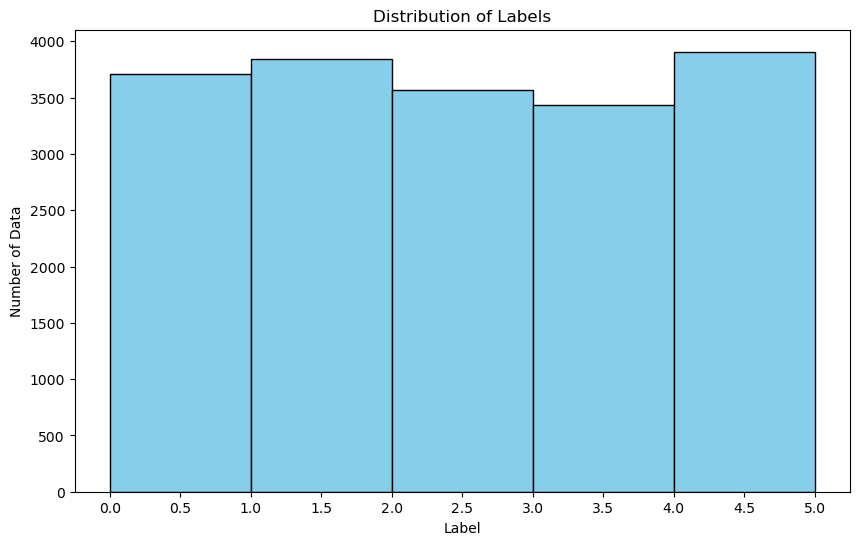

In [29]:
plt.figure(figsize=(10, 6))
sr_swap_copy['label'].plot(kind='hist', bins=np.arange(0, 5.5, 1), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels')
plt.show()

In [30]:
# SR_train_2.csv: 전처리 전 sr
sr_no_pre = pd.read_csv('../data/SR_train_2.csv')

# 전처리 all
train_all = pd.read_csv('../data/train_all.csv')

# 전처리 전 swap without 0
train_swap = pd.read_csv("../data/train3.csv")

concat1= pd.concat([sr_no_pre, train_all, train_swap], ignore_index=True)

concat1.drop_duplicates(subset=['sentence_1', 'sentence_2'], inplace=True)
concat1.to_csv("../data/concat1.csv", index=False)


plt.figure(figsize=(10, 6))
concat1['label'].plot(kind='hist', bins=np.arange(0, 5.5, 0.1), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../data/SR_train_2.csv'

In [6]:
nums = {}
for i in range(0, 51):
    nums[i/10] = sr10[sr10['label'] == i/10].shape[0]
    
print(nums)
print(max(nums.values()))
print(sr10.shape[0])

{0.0: 3919, 0.1: 0, 0.2: 988, 0.3: 0, 0.4: 1360, 0.5: 97, 0.6: 1052, 0.7: 0, 0.8: 1012, 0.9: 0, 1.0: 1106, 1.1: 0, 1.2: 1054, 1.3: 0, 1.4: 831, 1.5: 69, 1.6: 538, 1.7: 0, 1.8: 770, 1.9: 0, 2.0: 780, 2.1: 0, 2.2: 601, 2.3: 0, 2.4: 651, 2.5: 67, 2.6: 843, 2.7: 0, 2.8: 901, 2.9: 0, 3.0: 966, 3.1: 0, 3.2: 1071, 3.3: 0, 3.4: 1016, 3.5: 113, 3.6: 1544, 3.7: 0, 3.8: 1761, 3.9: 0, 4.0: 1890, 4.1: 0, 4.2: 1695, 4.3: 0, 4.4: 827, 4.5: 36, 4.6: 274, 4.7: 0, 4.8: 215, 4.9: 0, 5.0: 328}
3919
28375


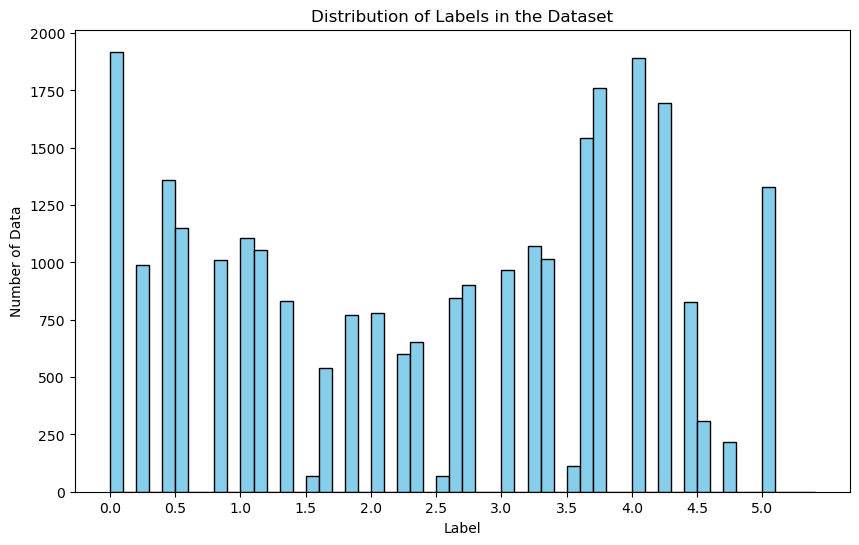

In [89]:
# SR_train_2.csv: 전처리 전 sr
sr_no_pre = pd.read_csv('../data/SR_train_2.csv')

# 전처리 all
train_all = pd.read_csv('../data/train_all.csv')

# 전처리 전 swap without 0
train_swap = pd.read_csv("../data/train3.csv")

# Combine all datasets
combined_df = pd.concat([sr_no_pre, train_all, train_swap], ignore_index=True)
combined_df.drop_duplicates(subset=['sentence_1', 'sentence_2'], inplace=True)
df_copy = combined_df[combined_df["label"] == 0.0].iloc[:2000].copy()

# Remove these 2000 samples from the original dataset
combined_df = combined_df.drop(df_copy.index)


df_to_copy = df_copy.iloc[:1000].copy()
df_to_copy["sentence_2"] = df_to_copy["sentence_1"]
df_to_copy["label"] = 5.0
df_to_copy["binary-label"] = 1.0
df_to_copy["id"] = df_to_copy["id"] + "_copied"

# Concatenate the new data back with the remaining dataset
final_df = pd.concat([combined_df, df_to_copy], ignore_index=True)
final_df.drop_duplicates(subset=['sentence_1', 'sentence_2'], inplace=True)

# Save final
final_df.to_csv("../data/concat2.csv", index=False)

plt.figure(figsize=(10, 6))
final_df['label'].plot(kind='hist', bins=np.arange(0, 5.5, 0.1), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels in the Dataset')
plt.show()

In [90]:
nums = {}
for i in range(0, 51):
    nums[i/10] = final_df[final_df['label'] == i/10].shape[0]
    
print(nums)
print(max(nums.values()))

{0.0: 1919, 0.1: 0, 0.2: 988, 0.3: 0, 0.4: 1360, 0.5: 97, 0.6: 1052, 0.7: 0, 0.8: 1012, 0.9: 0, 1.0: 1106, 1.1: 0, 1.2: 1054, 1.3: 0, 1.4: 831, 1.5: 69, 1.6: 538, 1.7: 0, 1.8: 770, 1.9: 0, 2.0: 780, 2.1: 0, 2.2: 601, 2.3: 0, 2.4: 651, 2.5: 67, 2.6: 843, 2.7: 0, 2.8: 901, 2.9: 0, 3.0: 966, 3.1: 0, 3.2: 1071, 3.3: 0, 3.4: 1016, 3.5: 113, 3.6: 1544, 3.7: 0, 3.8: 1761, 3.9: 0, 4.0: 1890, 4.1: 0, 4.2: 1695, 4.3: 0, 4.4: 827, 4.5: 36, 4.6: 274, 4.7: 0, 4.8: 215, 4.9: 0, 5.0: 1328}
1919


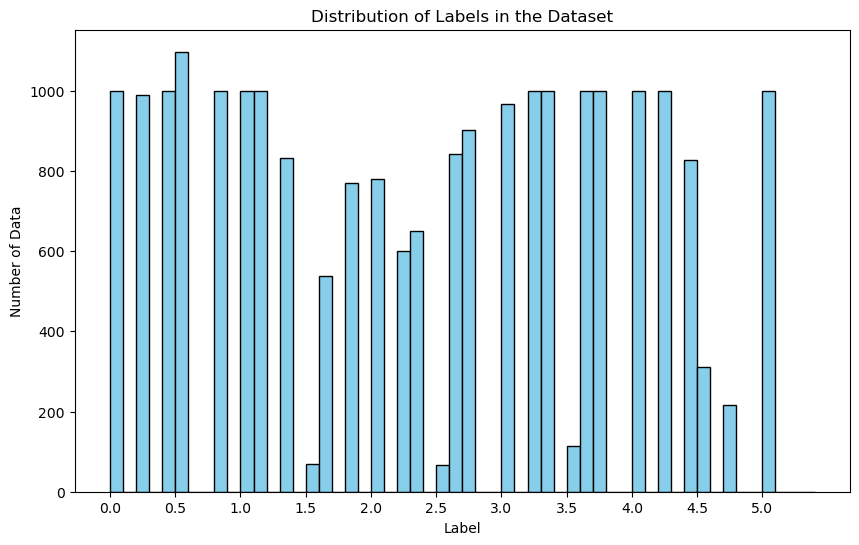

In [91]:
final_copy = final_df.copy()

for key, val in nums.items():
    while val > 1000:
        rows_to_drop = min(val - 1000, 500) 
        temp = final_df[final_df["label"] == key].iloc[:rows_to_drop]
        final_df = final_df.drop(temp.index)
        
        
        val = final_df[final_df['label'] == key].shape[0]

final_df.to_csv("../data/concat3.csv", index=False)       
plt.figure(figsize=(10, 6))
final_df['label'].plot(kind='hist', bins=np.arange(0, 5.5, 0.1), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels in the Dataset')
plt.show() 


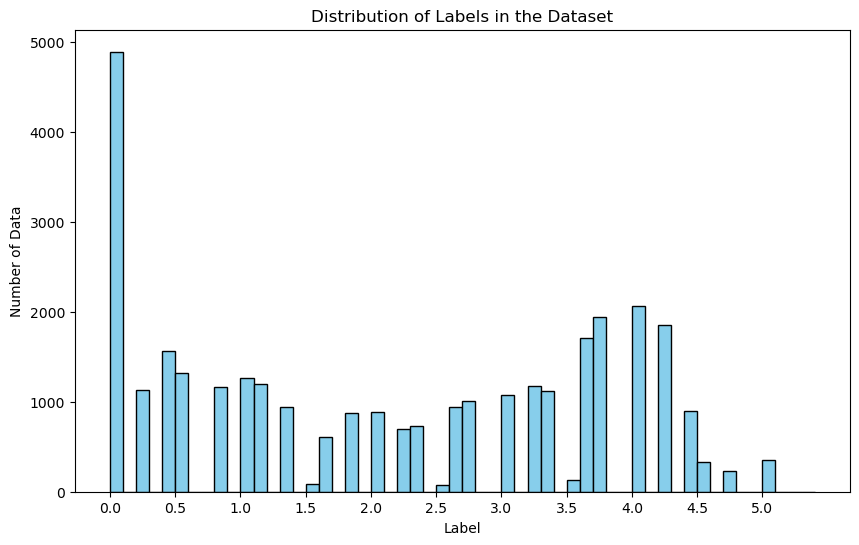

In [23]:
# 전처리 전 sr
sr_no_pre = pd.read_csv('../data/SR_train_2.csv')

# 3개의 다른 전처리 방법
train_repeat = pd.read_csv('../data/train_repeat.csv')
train_spacing = pd.read_csv('../data/train_spacing.csv')
train_spell = pd.read_csv('../data/train_spell.csv')

# 전처리 전 swap without 0
train_swap = pd.read_csv("../data/train3.csv")

concat= pd.concat([sr_no_pre, train_repeat, train_spacing, train_spell, train_swap], ignore_index=True)

concat.drop_duplicates(subset=['sentence_1', 'sentence_2'], inplace=True)
concat.to_csv("../data/concat4.csv", index=False)


plt.figure(figsize=(10, 6))
concat['label'].plot(kind='hist', bins=np.arange(0, 5.5, 0.1), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels in the Dataset')
plt.show()